# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do

For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



#### Datasets loading

In [ ]:
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('task 1.csv')
data.head()

index            browser          os locale  user_id          location  \
0   8909            Firefox  Windows 10  zh-CN       46    China/Shanghai   
1  17679  Internet Explorer   Windows 8  ro-RO       21    Germany/Berlin   
2  11803  Internet Explorer       MacOS  ur-PK       98  Australia/Sydney   
3    356  Internet Explorer      Ubuntu  pl-PL       44       Japan/Tokyo   
4  10948  Internet Explorer   Windows 8  bg-BG       59       Japan/Tokyo   

                                               sites      time        date  
0  [{'site': '1.static.dpreview.com', 'length': 1...  14:14:00  2016-01-28  
1  [{'site': 'safebrowsing-cache.google.com', 'le...  05:23:00  2016-08-26  
2  [{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...  12:03:00  2016-03-13  
3  [{'site': 'fr.hdscreen.me', 'length': 16}, {'s...  06:08:00  2017-01-19  
4  [{'site': '193.164.196.50', 'length': 10}, {'s...  03:59:00  2017-05-13

In [ ]:
# load the dataset
data_verify = pd.read_csv('task_1_verify.csv')
data_verify.head()

browser          os locale          location  \
0  Firefox   Windows 7  xh-ZA      USA/New York   
1   Chrome  Windows 10  pl-PL       Japan/Tokyo   
2  Firefox      Debian  vi-VN      France/Paris   
3  Firefox      Debian  en-US  Canada/Vancouver   
4  Firefox      Debian  en-CA  Australia/Sydney   

                                               sites      time        date  
0  [{'site': 'rr.office.microsoft.com', 'length':...  11:30:00  2016-10-05  
1  [{'site': 'maps.google.com', 'length': 14}, {'...  14:35:00  2016-05-06  
2  [{'site': 'cbk1.googleapis.com', 'length': 178...  14:31:00  2016-03-27  
3  [{'site': 'annotathon.org', 'length': 72}, {'s...  10:55:00  2016-12-31  
4  [{'site': 'apis.google.com', 'length': 75}, {'...  03:30:00  2017-01-19

### Preprocessing

In [ ]:
# check whether the dataset have missing values
print(f'Number of missing values: {data.isna().sum().sum()}')

Number of missing values: 0


In [ ]:
# find the amount of unique values in each column of the dataset
unique_values = pd.DataFrame({'Feature': data.columns, 
                              'Unique values': data.nunique()})

# sort the amount of unique values in each column in descending order
sorted_unique_values = (unique_values
                       .sort_values(by='Unique values', ascending=False)
)

In [ ]:
sorted_unique_values.head(3)

Feature  Unique values
index   index          20401
sites   sites          20388
time     time           1440

In [ ]:
# find the proportion of unique names in data
proportion_of_unique_idx = data['index'].nunique() / data.shape[0]
proportion_of_unique_idx

1.0

Based on the obtained proportion of unique values in the `index` column, all values of indexes are unique. Therefore, it can be concluded that this feature does not provide certain information about Waldo, so it is redundant and will not affect the prediction.

In [ ]:
# remove the redundant feature
data = data.drop(['index'], axis=1)

In [ ]:
import json

# extract time per session feature from the sites column
data['session_time'] = (
    data['sites']
    .apply(lambda x: sum(entry['length'] 
                         for entry in json.loads(x.replace("'", "\""))))
)

In [ ]:
# find and print the average session time of Waldo users
t_waldo = int(data[data['user_id'] == 0]['session_time'].mean())
print(f'The average session time of Waldo is {t_waldo}')

The average session time of Waldo is 1102


In [ ]:
# find and print the average session time of users who are not Waldo
t_others = int(data[data['user_id'] != 0]['session_time'].mean().round())
print(f'The average session time of not Waldo users is {t_others}')

The average session time of not Waldo users is 484


As we can observe, Waldo spends more time visiting the sites per one session than other users.

In [ ]:
# find number of unique sites
entries = []
sites = []
for value in data['sites']:
    entries.extend(json.loads(value.replace("'", "\"")))

for entry in entries:
    sites.append(entry['site'])

all_sites = pd.Series(sites)
print(f'Number of unique sites: {all_sites.nunique()}')

Number of unique sites: 11052


In [ ]:
# drop the sites
data = data.drop('sites', axis=1)
data.head()

browser          os locale  user_id          location      time  \
0            Firefox  Windows 10  zh-CN       46    China/Shanghai  14:14:00   
1  Internet Explorer   Windows 8  ro-RO       21    Germany/Berlin  05:23:00   
2  Internet Explorer       MacOS  ur-PK       98  Australia/Sydney  12:03:00   
3  Internet Explorer      Ubuntu  pl-PL       44       Japan/Tokyo  06:08:00   
4  Internet Explorer   Windows 8  bg-BG       59       Japan/Tokyo  03:59:00   

         date  session_time  
0  2016-01-28           117  
1  2016-08-26          1559  
2  2016-03-13           313  
3  2017-01-19           451  
4  2017-05-13           164

As can be seen, number of unique sites is quite large, so I decided to remove information about the site addresses.

In [ ]:
# split the location column into 2 new columns
data[['country', 'city']] = (data['location']
                            .str.split(pat="/", expand=True)
)
data = data.drop(['location'], axis=1)

data.head()

browser          os locale  user_id      time        date  \
0            Firefox  Windows 10  zh-CN       46  14:14:00  2016-01-28   
1  Internet Explorer   Windows 8  ro-RO       21  05:23:00  2016-08-26   
2  Internet Explorer       MacOS  ur-PK       98  12:03:00  2016-03-13   
3  Internet Explorer      Ubuntu  pl-PL       44  06:08:00  2017-01-19   
4  Internet Explorer   Windows 8  bg-BG       59  03:59:00  2017-05-13   

   session_time    country      city  
0           117      China  Shanghai  
1          1559    Germany    Berlin  
2           313  Australia    Sydney  
3           451      Japan     Tokyo  
4           164      Japan     Tokyo

In [ ]:
# check the unique values in categorical columns
categ_cols = ['browser', 'os', 'locale', 'city', 'country']
for col in categ_cols:
    print(f'Column {col}: {data[col].unique()}')
    print()

Column browser: ['Firefox' 'Internet Explorer' 'Chrome' 'Safari']

Column os: ['Windows 10' 'Windows 8' 'MacOS' 'Ubuntu' 'Debian' 'Windows 7']

Column locale: ['zh-CN' 'ro-RO' 'ur-PK' 'pl-PL' 'bg-BG' 'fr-FR' 'xh-ZA' 'nl-NL' 'en-AU'
 'en-CA' 'en-NZ' 'vi-VN' 'en-US' 'ja-JP' 'wo-SN' 'uk-UA' 'ru_RU' 'pt-BR'
 'pt-PT' 'en-SG' 'de-DE' 'es-MX' 'it-IT' 'en-GB' 'ru-RU']

Column city: ['Shanghai' 'Berlin' 'Sydney' 'Tokyo' 'Auckland' 'Toronto' 'Amsterdam'
 'Moscow' 'Chicago' 'Singapore' 'San Francisco' 'Rome' 'London' 'Madrid'
 'Vancouver' 'Delhi' 'Paris' 'New York' 'Kuala Lumpur' 'Miami'
 'Rio de Janeiro']

Column country: ['China' 'Germany' 'Australia' 'Japan' 'New Zealand' 'Canada'
 'Netherlands' 'Russia' 'USA' 'Singapore' 'Italy' 'UK' 'Spain' 'India'
 'France' 'Malaysia' 'Brazil']



As can be seen, column `locale` has duplicate values: 'ru_RU' and 'ru-RU'. Let's clean up them:

In [ ]:
# remove duplicate values
cleanup_vals = {'locale': {'ru_RU': 'ru-RU'} }
data.replace(cleanup_vals, inplace=True)

In [ ]:
# find the locale of Waldo users
for loc in data[data['user_id'] == 0]['locale'].unique().tolist():
    print(f'Locale of Waldo users: {loc}')

Locale of Waldo users: ru-RU


In [ ]:
# find the locale of Waldo users
locales = data[data['user_id'] != 0]['locale'].unique().tolist()
print(f'Locale of not Waldo users: {locales}')

Locale of not Waldo users: ['zh-CN', 'ro-RO', 'ur-PK', 'pl-PL', 'bg-BG', 'fr-FR', 'xh-ZA', 'nl-NL', 'en-AU', 'en-CA', 'en-NZ', 'vi-VN', 'en-US', 'ja-JP', 'wo-SN', 'uk-UA', 'pt-BR', 'pt-PT', 'en-SG', 'ru-RU', 'de-DE', 'es-MX', 'it-IT', 'en-GB']


As can be seen, each Waldo user has `ru-RU` locale.

#### Identifying the appropriate classification approach


First, the task is to identify Waldo - the user with user_id=0. So, we have the following class labels: 

*   users with user_id not equal to 0
*   users whose user_id=0 



Therefore, we are dealing with the binary classification problem.

In [ ]:
# select predictors from the dataset
X = data.drop(['user_id'], axis=1)

# create target (1 if Waldo, 0 otherwise)
y = (data['user_id'] == 0).astype('int')

Secondly, let's take a look on the dataset balance. We should check whether the dataset is balanced or not:

In [ ]:
# find the proportion of Waldo class 
waldo_proportion = sum(y == 1) / len(y)
print(f'Proportion of Waldo class in dataset: {waldo_proportion:.4f}')

Proportion of Waldo class in dataset: 0.0196


In [ ]:
# find the proportion of not Waldo class
proportion = sum(y == 0) / len(y)
print(f'Proportion of not Waldo class in dataset: {proportion:.4f}')

Proportion of not Waldo class in dataset: 0.9804


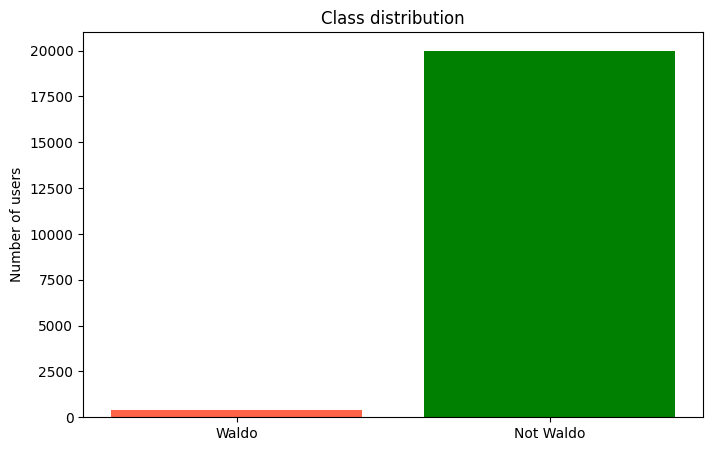

In [ ]:
import matplotlib.pyplot as plt


# plot the number of observations in each target class
fig = plt.figure(figsize = (8, 5))

classes = ['Waldo', 'Not Waldo']
observ = [sum(y == 1), sum(y == 0)]

plt.title('Class distribution')
plt.ylabel('Number of users')
plt.bar(classes, observ, color=['tomato', 'g'])
              
plt.show()

According to the observed proportions of classes and the bar chart above, the target class has an uneven distribution of observations. Therefore, the dataset is imbalanced.

To sum up, in this task we are working with binary imbalanced classification problem.

#### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  
                                                    stratify=y)

#### Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# encode categorical features with one-hot-encoder
def encoding(df, feat_name, encoder):
    new_feats = encoder.transform(df[feat_name])
    new_cols = pd.DataFrame(new_feats, 
                  columns=encoder.get_feature_names_out(feat_name))
    new_df = pd.concat([df.reset_index(drop=True), new_cols], axis=1)    
    new_df.drop(feat_name, axis=1, inplace=True)
    return new_df


# define encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# define categorical features to be encoded
feature_cols = ['browser', 'os', 'locale', 'city', 'country']

# encode categorical features in both training and test datasets
encoder.fit(X_train[feature_cols])
X_train = encoding(X_train, feature_cols, encoder)
X_test = encoding(X_test, feature_cols, encoder)

#### Cyclical features encoding

In [ ]:
# using ideas from https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

secs_in_day = 24 * 60 * 60
avg_days_in_month = 30
days_in_week = 7
months_in_year = 12

# compute sinus transform
def sin_transform(value, total):
    return np.sin(2 * np.pi * value/ total)

# compute cosine transfrom
def cos_transform(value, total):
    return np.cos(2 * np.pi * value/ total)

# encode time feature
def time_encoding(df, feature_name):
    df[feature_name] = pd.to_datetime(df[feature_name], format='%H:%M:%S')
    hours = df[feature_name].dt.hour
    mins = df[feature_name].dt.minute
    secs = df[feature_name].dt.second
    time = hours * 60 * 60 + mins * 60 + secs
    df['sin_time'] = sin_transform(time, secs_in_day)
    df['cos_time'] = cos_transform(time, secs_in_day)
    df.drop([feature_name], axis=1, inplace=True)

# encode date feature
def date_encoding(df, feature_name):
    df[feature_name] = pd.to_datetime(df[feature_name], format='%Y-%m-%d')
    weekday = df[feature_name].dt.weekday
    df['sin_weekday'] = sin_transform(weekday, days_in_week)
    df['cos_weekday'] = cos_transform(weekday, days_in_week)
    year = df[feature_name].dt.year
    df['year'] = year
    month = df[feature_name].dt.month
    df['sin_month'] = sin_transform(month, months_in_year)
    df['cos_month'] = cos_transform(month, months_in_year)
    day = df[feature_name].dt.day
    df['sin_day'] = sin_transform(day, avg_days_in_month)
    df['cos_day'] = cos_transform(day, avg_days_in_month)
    df.drop([feature_name], axis=1, inplace=True)

# encode time and date features in both training and test sets
time_encoding(X_train, 'time')
date_encoding(X_train, 'date')

time_encoding(X_test, 'time')
date_encoding(X_test, 'date')

In [ ]:
print('Total number of features:', X_train.shape[1])

Total number of features: 77


#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# define and fit the standard scaler on training set
scaler = StandardScaler()
scaler.fit(X_train)

# scale features in both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Let's proceed similar steps of preprocessing with data from `task_1_verify.csv`

In [ ]:
# extract time per session feature from the sites column
data_verify['time_per_session'] = (
    data_verify['sites']
    .apply(lambda x: sum(entry['length'] 
                         for entry in json.loads(x.replace("'", "\""))))
)
data_verify = data_verify.drop('sites', axis=1)
data_verify.head()

browser          os locale          location      time        date  \
0  Firefox   Windows 7  xh-ZA      USA/New York  11:30:00  2016-10-05   
1   Chrome  Windows 10  pl-PL       Japan/Tokyo  14:35:00  2016-05-06   
2  Firefox      Debian  vi-VN      France/Paris  14:31:00  2016-03-27   
3  Firefox      Debian  en-US  Canada/Vancouver  10:55:00  2016-12-31   
4  Firefox      Debian  en-CA  Australia/Sydney  03:30:00  2017-01-19   

   time_per_session  
0                94  
1               716  
2               679  
3               222  
4               850

In [ ]:
# split the location column into 2 new columns
data_verify[['country', 'city']] = (data_verify['location']
                                   .str.split(pat="/", expand=True)
)
data_verify = data_verify.drop(['location'], axis=1)
data_verify.head()

browser          os locale      time        date  time_per_session  \
0  Firefox   Windows 7  xh-ZA  11:30:00  2016-10-05                94   
1   Chrome  Windows 10  pl-PL  14:35:00  2016-05-06               716   
2  Firefox      Debian  vi-VN  14:31:00  2016-03-27               679   
3  Firefox      Debian  en-US  10:55:00  2016-12-31               222   
4  Firefox      Debian  en-CA  03:30:00  2017-01-19               850   

     country       city  
0        USA   New York  
1      Japan      Tokyo  
2     France      Paris  
3     Canada  Vancouver  
4  Australia     Sydney

In [ ]:
# remove duplicate values
cleanup_vals = {'locale': {'ru_RU': 'ru-RU'} }
data_verify.replace(cleanup_vals, inplace=True)

In [ ]:
# one-hot-encode categorical features
data_verify = encoding(data_verify, feature_cols, encoder)

# encode time and date features
time_encoding(data_verify, 'time')
date_encoding(data_verify, 'date')

# scale features
scaler.fit(data_verify) 
data_verify = scaler.transform(data_verify)

### Building ANN Model

#### Fine-tuning the architecture

*   Determined the input and output layer dimensionality (input=77 and output=1);
*   Use the model architecture from an [article](https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89) that performs well on the similar problem;
*   Try different values for hyperparameters.




In [ ]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
# create class for a dataset
class Dataset(Dataset):
    def __init__(self, features, target=None):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, i):
        x = torch.tensor(self.features[i], dtype=torch.float)
        if self.target is None:
            return x
        else:
            y = torch.tensor(self.target[i], dtype=torch.float)
            return x, y


# create class for a model
class Model(nn.Module):
    def __init__(self, input=77, output=1):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64), 
            nn.ReLU(), 
            nn.Dropout(p=0.2),
            nn.Linear(64, output)
        )
        
    def forward(self, x):
        return self.model(x)
        

In [ ]:
# define train dataset using Dataset class
train_dataset = Dataset(X_train, np.array(y_train))

# split the train dataset into train (90%) and validation (10%) sets
size = len(train_dataset)
train_dataset, val_dataset = random_split(train_dataset, 
                            [int(0.9 * size), (size - int(0.9 * size))])

# define test dataset using Dataset class
test_dataset = Dataset(X_test, np.array(y_test))

# define size of the batch
batch_size = 64

# create data loaders for train, validation and test sets
train_dataloader = DataLoader(train_dataset, 
                              batch_size=batch_size, 
                              shuffle=True)

val_dataloader = DataLoader(val_dataset, 
                             batch_size=batch_size, 
                             shuffle=False)

test_dataloader = DataLoader(test_dataset, 
                             batch_size=batch_size, 
                             shuffle=False) 

# set the device to either GPU or CPU
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# define a model 
model = Model(input=77, output=1).to(device)
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=77, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=64, out_features=1, bias=True)
  )
)


### Training & Validation

In [ ]:
from tqdm import tqdm
from sklearn.metrics import recall_score, precision_score, f1_score 


# define the learning rate and number of epochs to train the model for
lr = 0.001
epochs = 30

# define the loss function
loss_fn = nn.BCEWithLogitsLoss()

# define the optimizer
opt = torch.optim.Adam(model.parameters(), lr=lr)

# define the learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)


# define the train function to train the model
def train(model, device, train_loader, loss_fn, opt, epoch):
    # set the model to the training mode
    model.train()
    train_loss = 0
    bar = tqdm(train_loader)
    # iterate through the data loader
    for input, target in bar:
        input, target = input.to(device), target.to(device)
        opt.zero_grad()
        pred = model(input)
        loss = loss_fn(pred, target.unsqueeze(1))
        loss.backward()
        opt.step()
        train_loss += loss.item()
        
    # print and return the average loss 
    avg_loss = train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{epochs}: loss = {avg_loss}')
    return avg_loss
    

# define the evaluate function for validation
def evaluate(model, device, val_loader, loss_fn, opt):
    model.eval()
    preds = []
    true_target = []
    val_loss = 0
    with torch.no_grad():
        # iterate over validation data
        for input, target in val_loader:
            input, target = input.to(device), target.to(device)
            pred = model(input)
            loss = loss_fn(pred, target.unsqueeze(1))
            val_loss += loss.item()
            preds.append(((torch.sigmoid(pred.cpu().data)) > 0.5) * 1)
            true_target.append(target.cpu().data.numpy().reshape(-1, 1))

    # calculate and print validation metrics for imbalanced case
    precision = precision_score(np.vstack(preds), np.vstack(true_target))
    recall = recall_score(np.vstack(preds), np.vstack(true_target))
    f1 = f1_score(np.vstack(preds), np.vstack(true_target))
    avg_val_loss = val_loss / len(val_loader)

    print(f'val loss = {avg_val_loss}, val precision = {precision}, val recall = {recall}, val f1 score = {f1}')
    
    # return the average validation loss
    return avg_val_loss


losses = []
val_losses = []
for epoch in range(epochs):
    # train the model
    train_loss = train(model, device, train_dataloader, loss_fn, opt, epoch)
    losses.append(train_loss)

    # evaluate the model on the validation set
    val_loss = evaluate(model, device, val_dataloader, loss_fn, opt)
    val_losses.append(val_loss)

    # step the learning rate scheduler
    lr_scheduler.step()

100%|██████████| 230/230 [00:00<00:00, 280.56it/s]


Epoch 1/30: loss = 0.19878440964157168
val loss = 0.036104450575434245, val precision = 0.8, val recall = 1.0, val f1 score = 0.888888888888889


100%|██████████| 230/230 [00:00<00:00, 326.90it/s]


Epoch 2/30: loss = 0.027945035112940747
val loss = 0.010380396923909966, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 319.84it/s]


Epoch 3/30: loss = 0.013318464765325189
val loss = 0.004734574020123825, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 334.11it/s]


Epoch 4/30: loss = 0.0090975779371903
val loss = 0.0032302139398570242, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 326.97it/s]


Epoch 5/30: loss = 0.006493612920420002
val loss = 0.0018853048565618407, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 316.09it/s]


Epoch 6/30: loss = 0.005585176119094958
val loss = 0.00125383054658484, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 338.52it/s]


Epoch 7/30: loss = 0.00461490273693293
val loss = 0.0009156311336062992, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 331.93it/s]


Epoch 8/30: loss = 0.0046370241798602205
val loss = 0.0005820888663248087, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 312.80it/s]


Epoch 9/30: loss = 0.004042090413175807
val loss = 0.0007108746537526783, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 337.64it/s]


Epoch 10/30: loss = 0.00424561882075226
val loss = 0.0008345251794358214, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 340.19it/s]


Epoch 11/30: loss = 0.002797591268545543
val loss = 0.000650402963891303, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 270.41it/s]


Epoch 12/30: loss = 0.002544616282102652
val loss = 0.000570716946990265, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 239.65it/s]


Epoch 13/30: loss = 0.002391149646744294
val loss = 0.0005470563337439671, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 259.10it/s]


Epoch 14/30: loss = 0.002358104932531917
val loss = 0.0005763623037357599, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 326.16it/s]


Epoch 15/30: loss = 0.0023231275437865405
val loss = 0.0005511006954923057, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 341.96it/s]


Epoch 16/30: loss = 0.0021519986826562037
val loss = 0.00045059381395381375, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 334.62it/s]


Epoch 17/30: loss = 0.002148768290214281
val loss = 0.0005328597018468337, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 321.61it/s]


Epoch 18/30: loss = 0.0023400318271065454
val loss = 0.0004837497007639076, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 321.56it/s]


Epoch 19/30: loss = 0.0020268887721771457
val loss = 0.00041908021068173606, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 334.70it/s]


Epoch 20/30: loss = 0.0019467596866256233
val loss = 0.0004632745622075163, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 332.18it/s]


Epoch 21/30: loss = 0.001979985541180687
val loss = 0.0003573586050501595, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 332.19it/s]


Epoch 22/30: loss = 0.0021668212854622296
val loss = 0.0004299582528451887, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:01<00:00, 181.78it/s]


Epoch 23/30: loss = 0.002096966905051174
val loss = 0.0003754115325416653, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 335.06it/s]


Epoch 24/30: loss = 0.0018720682232726729
val loss = 0.0003899850621215032, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 338.59it/s]


Epoch 25/30: loss = 0.0017083505020507248
val loss = 0.0004275816460834064, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 346.44it/s]


Epoch 26/30: loss = 0.0018937455098595186
val loss = 0.000423672716771342, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 255.84it/s]


Epoch 27/30: loss = 0.0017499773653031772
val loss = 0.00042328324063698977, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 233.50it/s]


Epoch 28/30: loss = 0.0017720655929145362
val loss = 0.0004809467587060331, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 285.46it/s]


Epoch 29/30: loss = 0.001566018935219567
val loss = 0.0005355581219751352, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 343.30it/s]


Epoch 30/30: loss = 0.001926912253206272
val loss = 0.0003271388573361597, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


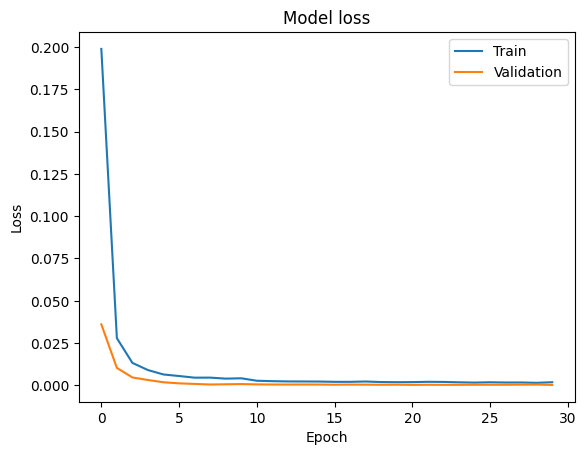

In [ ]:
# plot the train and validation losses 
plt.plot(losses)
plt.plot(val_losses)

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

### Evaluate the model on test data

In [ ]:
from sklearn.metrics import classification_report


# define the test function 
def test(model, device, test_loader):
    model.eval()
    preds = []
    true_target = []
    test_loss = 0
    with torch.no_grad():
        # iterate over test data
        for input, target in test_loader:
            input, target = input.to(device), target.to(device)
            pred = model(input)
            preds.append(((torch.sigmoid(pred.cpu().data)) > 0.5) * 1)
            true_target.append(target.cpu().data.numpy().reshape(-1, 1))
    # return predictions and actual targets
    return preds, true_target


# test the model
y_pred, y_true = test(model, device, test_dataloader)

# report metrics on test set
print(classification_report(np.vstack(y_true), np.vstack(y_pred)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4001
         1.0       0.94      0.97      0.96        80

    accuracy                           1.00      4081
   macro avg       0.97      0.99      0.98      4081
weighted avg       1.00      1.00      1.00      4081



#### Predict each user in `task_1_verify.csv`

In [ ]:
# define a function to get predictions
def predict(model, device, dataloader):
    model.eval()
    preds = []
    with torch.no_grad():
        for input in dataloader:
            input = input.to(device)
            pred = model(input)
            preds.append(((torch.sigmoid(pred.cpu().data)) > 0.5) * 1)
    
    return preds


# create a dataset for data_verify from 'task_1_verify.csv'
verify_dataset = Dataset(data_verify)

# create the data loader for the verify dataset
verify_loader = DataLoader(verify_dataset, 
                           batch_size=batch_size, 
                           shuffle=False)

# get the prediction
prediction = np.vstack(predict(model, device, verify_loader)).flatten()

# print the prediction where 1 - waldo, 0 - user is not waldo
for i in range(len(prediction)):
    print(i, ':', prediction[i])
  

0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
11 : 0
12 : 0
13 : 0
14 : 0
15 : 0
16 : 0
17 : 0
18 : 0
19 : 0
20 : 0
21 : 0
22 : 0
23 : 0
24 : 0
25 : 0
26 : 0
27 : 0
28 : 0
29 : 0
30 : 0
31 : 1
32 : 1
33 : 1
34 : 1
35 : 1


As was obtained, the last 5 users are Waldo.

### Questions
1. Did you find any usefull insights from your data analysis?
    - Yes, I did. Specifically, I have observed an unbalanced distribution of class labels, i.e. there are only 2% of samples in data associated with Waldo user label. As a result, to evaluate the model's performance further, I use such metrics as recall, precision and F1 score.
    - Additionaly, I found out that average sites session time of Waldo users is almost 2.5 times higher than the average session time of not Waldo users, namely 1102 seconds against 484 seconds.
    - What is more, all Waldo users have `ru-RU` locale identifier.
2. What preprocessing techniques did you use? Why?
    - First of all, I checked the dataset for missing values and duplicated values in the columns. I observed that the dataset have no missing values, so there is no need to impute them. The column `locale` has the duplicates `ru-RU` and `ru_RU`, so I handle them.
    - I removed redundant features that seemed irrelevant, such as `index` and `sites`.
    - To encode categorical features, I used One-Hot encoding, since the features (`city`, `country`, etc.) have no ordinal relationship. Also, I encode cyclical features `time` and `date` using sin and cosine transforms.
    - Finally, I applied feature normalization to zero mean and unit variance using Standard Scaler.
3. Describe the fine-tuning process and how you reached your model architecture.
    - To begin with, I determined the input and output layer dimensionality as 77 and 1, respectively. 
    - I tried to tune the model architecture by my intuition, however, this did not provide good results. Then, I researched and found a relevant [article](https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89) that dealt with the similar problem and performed quite well. I decided to construct my model with the same number of layers, number of neurons and same activation functions. 
    - As stated in the task description, I held out 20% of the data as a test set. Furthermore, I splitted the remaining data into train and val splits. The training set was used to optimize the model parameters during training. In contrast, the validation set was employed to tune the model's hyperparameters (number of hidden layers, dimensionality, etc.). As part of the validating process, I also tried different values of probability in the Dropout layer and determined that p=0.2 performed better in this task.
4. Which metric did you try to optimize for this task? Why?
    - As mentioned in my answer to question 1, we have a highly imbalanced dataset where only 2% of data correspond to the positive (Waldo) class.  In this case, the accuracy metric is not reliable. Thus, I had to choose from the metrics computed based on the confusion matrix, such as recall, precision, and F1-score. In the task description, it is not specifically stated whether it is more important to detect all sessions associated with Waldo (aim for high recall) or if we want to reduce the number of false positives even if sometimes we do not detect Waldo (aim for high precision). That is why, I used F1-score as the main metric that is based on both precision and recall. 
    

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
[Download link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

#### Data extracting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "drive/MyDrive/Копия task 2.zip" "task 2.zip"

In [3]:
!unzip "task 2.zip"

Archive:  task 2.zip
 extracting: test.zip                
 extracting: train.zip               


In [ ]:
!unzip test.zip 
!unzip train.zip

### Datasets loading & Preprocessing & Data augmentation

In [5]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import transforms
from torchvision.transforms.functional import crop
from PIL import Image
import os
import random 

In [6]:
# get the absolute filenames of images in the directory
def get_filenames(img_dir):
    image_files = []
    for img_name in os.listdir(img_dir):
            img_filename = os.path.join(img_dir, img_name)
            if os.path.isfile(img_filename):
                image_files.append(img_filename)
    return image_files


# define a class for an image dataset 
class ImageDataset(Dataset):
    def __init__(self, img_filenames, transform=None, aug_transform=None):
        self.img_filenames = img_filenames
        self.transform = transform
        self.aug_transform = aug_transform

    def __len__(self):
        return len(self.img_filenames)

    def __getitem__(self, i):
        img_path = self.img_filenames[i]
        image = Image.open(img_path)
        label = int(img_path.split("_")[1].split(".")[0])
    
        if self.transform:
            image = self.transform(image)

        if self.aug_transform:
            image = self.aug_transform(image)
 
        return image, label

In [7]:
train_batch_size = 64
test_batch_size = 64
val_batch_size = 64
min_h = 103
min_w = 96
top, left = 2, 2


# data preprocessing
transform = transforms.Compose([
    transforms.Resize((min_h, min_w)), 
    transforms.Lambda(lambda img: crop(img, top, left, 
                                       min_h - 13, min_w - 6)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# put data augmentation 
data_augmentation = transforms.Compose([
    transforms.RandomApply([
        transforms.RandomRotation((-5, 5), fill=1),
        ], p = 0.6)
])


# get the absolute filenames of images for train and test directories
train_images = get_filenames('/content/train/')
test_images = get_filenames('/content/content/test/')

# split the train images to train (80%) and validation (20%)
split = int(len(train_images) * 0.8)
random.shuffle(train_images)
train_images, val_images = train_images[:split], train_images[split:]


# define train set, apply preprocessing and random data augmentation
train_dataset = ImageDataset(train_images, 
                             transform=transform, 
                             aug_transform=data_augmentation)

# define validation data set and apply preprocessing
val_dataset = ImageDataset(val_images, 
                           transform=transform)

# define test data set and apply preprocessing
test_dataset = ImageDataset(test_images, 
                            transform=transform)

In [8]:
# define the loader of train data set
train_dataloader = DataLoader(train_dataset, 
                               batch_size=train_batch_size, 
                               shuffle=True)

# define the loader of train data set
val_dataloader = DataLoader(val_dataset, 
                            batch_size=val_batch_size)

# define the loader of test data set
test_dataloader = DataLoader(test_dataset, 
                             batch_size=test_batch_size)

#### Check the class distributions in the data sets

In [9]:
from collections import Counter


# compute the number of each class in the data set
def check_class_balance(dataset):
    labels = []
    for _, label in dataset:
        labels.append(label)
    counts = Counter(labels)
    return counts

In [10]:
# specify the labels
label_titles = ['left_thumb', 'left_index', 'left_middle', 'left_ring', 
               'left_little', 'right_thumb', 'right_index', 
               'right_middle', 'right_ring', 'right_little']

# check the class balance in train data set
train_balance = check_class_balance(train_dataset)

print('Train set balance:\n')
for idx, count in train_balance.items():
    print('{}: count {}'.format(label_titles[idx], count))

Train set balance:

right_thumb: count 1559
right_little: count 1524
right_middle: count 1554
left_little: count 1551
left_ring: count 1546
right_index: count 1568
left_middle: count 1556
left_index: count 1540
right_ring: count 1564
left_thumb: count 1568


In [11]:
# check the class balance in validation data set
val_balance = check_class_balance(val_dataset)

print('Validation set balance:\n')
for idx, count in val_balance.items():
    print('{}: count {}'.format(label_titles[idx], count))

Validation set balance:

left_middle: count 394
right_index: count 372
right_middle: count 384
left_index: count 381
right_little: count 402
left_ring: count 406
left_thumb: count 382
right_ring: count 382
right_thumb: count 382
left_little: count 398


In [12]:
# check the class balance in test data set
test_balance = check_class_balance(test_dataset)

print('Test set balance:\n')
for idx, count in test_balance.items():
    print('{}: count {}'.format(label_titles[idx], count))

Test set balance:

right_ring: count 1406
right_middle: count 1369
left_middle: count 1479
left_little: count 1372
right_index: count 1305
left_thumb: count 1617
left_index: count 1415
left_ring: count 1498
right_little: count 1344
right_thumb: count 1467


As can be observed, the train, validation and test data sets are balanced. Therefore, to further evaluate the model's performance, we can use the accuracy score.

#### Visualization of the preprocessed data

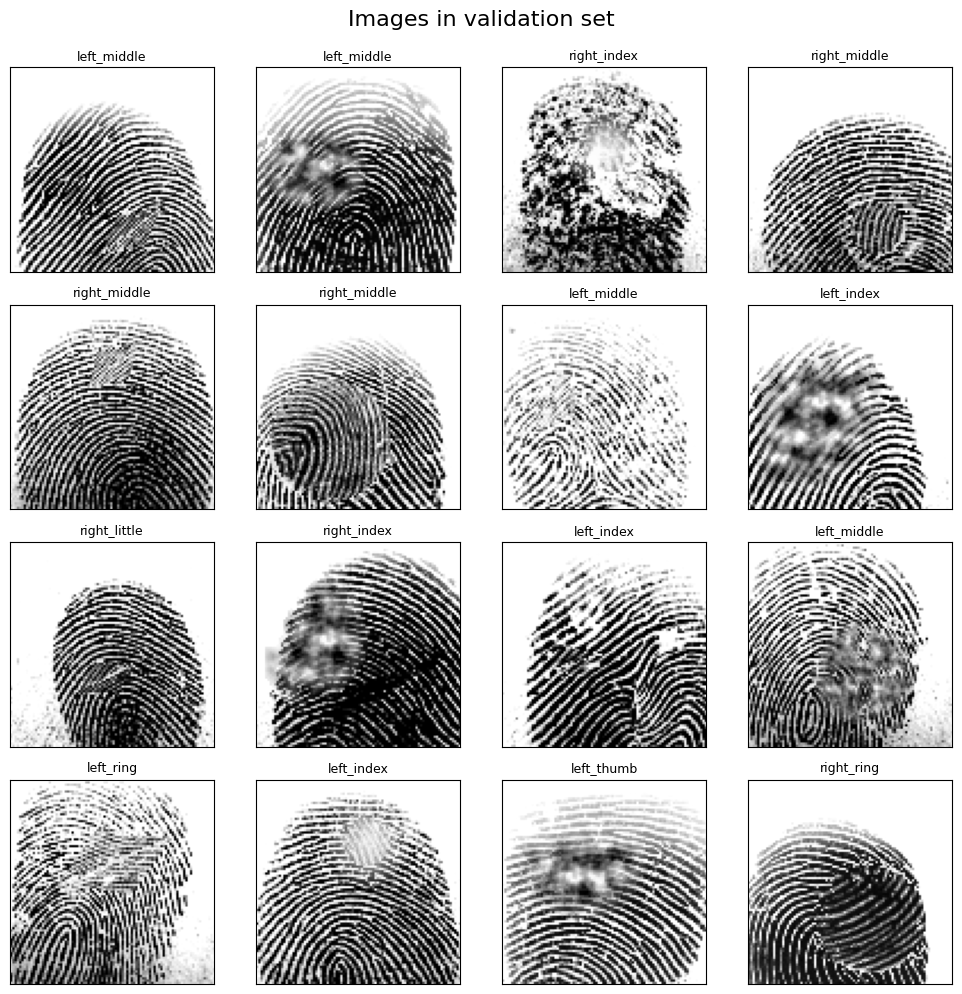

In [13]:
import matplotlib.pyplot as plt


# get one batch of validation images
images, labels = next(iter(val_dataloader))

# check the results of preprocessing

fig = plt.figure(figsize=(10, 10))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(images[i].numpy().transpose(1,2,0), cmap='gray')
    ax.set_title(label_titles[labels[i]], fontsize=9)

plt.suptitle('Images in validation set', 
             fontsize=16, y=0.99)
plt.tight_layout()
plt.show()

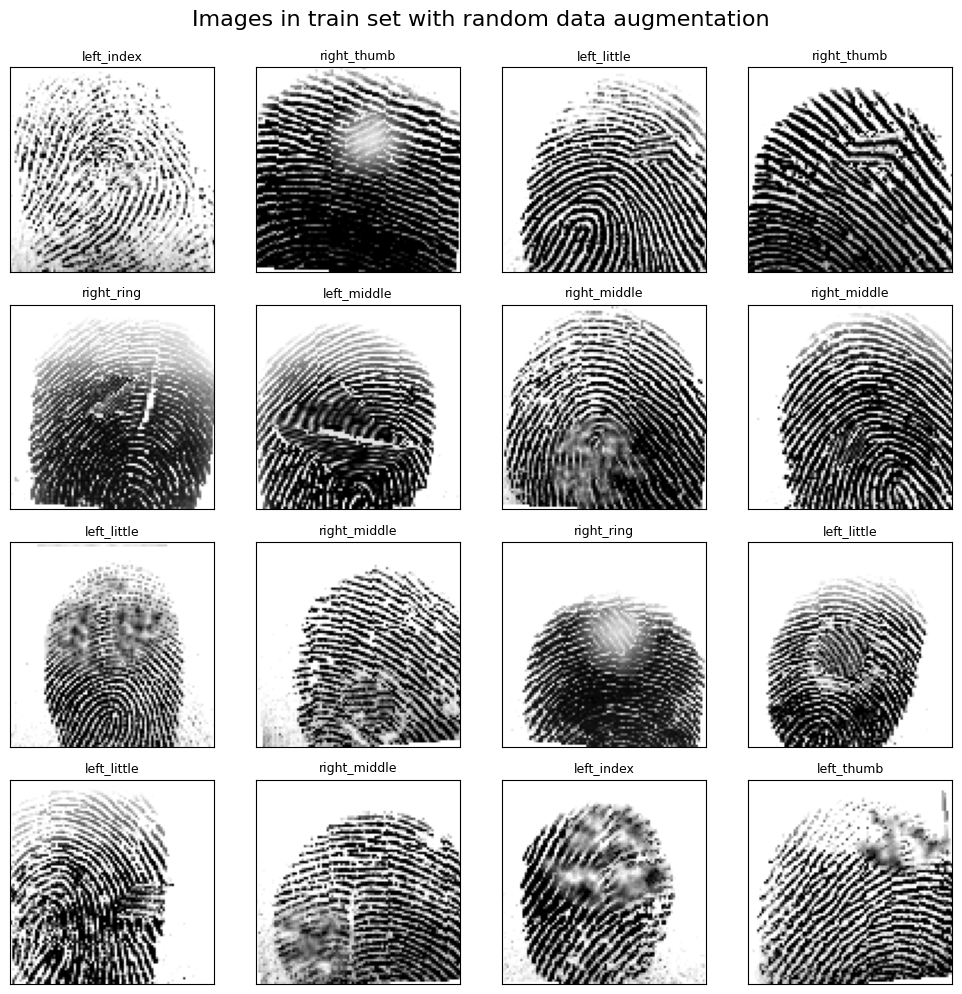

In [14]:
# check the results of preprocessing and data augmentation

# get one batch of train images
images, labels = next(iter(train_dataloader))

fig = plt.figure(figsize=(10, 10))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(images[i].numpy().transpose(1,2,0), cmap='gray')
    ax.set_title(label_titles[labels[i]], fontsize=9)

plt.suptitle('Images in train set with random data augmentation', 
             fontsize=16, y=0.99)
plt.tight_layout()
plt.show()

### Building CNN Model 

#### Fine-tuning the model architecture


*   Determine the output layer dimensionality (output=10 to match the number of label classes in the dataset);
*   Using the model architecture from "Fingerprint Classification Using Deep Convolutional Neural Network" [paper](https://www.sciencepublishinggroup.com/journal/paperinfo?journalid=239&doi=10.11648/j.jeee.20210905.11);
*   Trying different model architectures: take the model architecture from the paper as a basis and try different number of layers, add paddings to the layers if needed, add new Dropout and Batch normalization layers if this will improve the performance of the model applied for this task.



In [63]:
class CNN(nn.Module):
    def __init__(self, output=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential( # input 90 * 90 * 1
            nn.Conv2d(1, 32, 5, 3, 1), # 32 * 30 * 30
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 32, 5, 3, 1), # 32 * 10 * 10
            nn.ReLU(),
            nn.BatchNorm2d(32), 
            nn.MaxPool2d(2, 2), # 32 * 5 * 5
            nn.Dropout(0.4)
        )

        self.linear1 = nn.Sequential(
            nn.Linear(32 * 5 * 5, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, output) 
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        return F.log_softmax(x, dim=1)


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = CNN(output=10).to(device)

print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.4, inplace=False)
  )
  (linear1): Sequential(
    (0): Linear(in_features=800, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)


#### Early Stopping

In [64]:
import operator
import numpy as np

# define a class for early stopping 
# stop training if validation loss stops decrease after given patience
class EarlyStopping():
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False
        self.min_val_loss = np.inf 
        self.operation = operator.gt 
    
    def __call__(self, val_loss):
        delta = (val_loss - self.min_val_loss)

        if self.operation(delta, self.min_delta):
            self.counter += 1
        else:
            self.counter = 0
            self.min_val_loss = val_loss

        if self.counter >= self.patience:
            self.early_stop = True

        return self.early_stop

#### Training & Validation

In [65]:
from tqdm import tqdm


# define the learning rate and number of epochs to train the model for
lr = 0.001
epochs = 100
patience = 5

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the optimizer
opt = torch.optim.Adam(model.parameters(), lr=lr)

# define the learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', 
                                                          factor=0.7, 
                                                          patience=3)

# define the early stopping
early_stopping = EarlyStopping(patience=patience)


# define the train function to train the model
def train(model, device, train_loader, criterion, opt, epoch):
    # set the model to the training mode
    model.train()
    train_loss = 0
    bar = tqdm(train_loader)
    # iterate through the data loader
    for input, target in bar:
        input, target = input.to(device), target.to(device)
        opt.zero_grad()

        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        opt.step()
        train_loss += loss.item()
        
    # print and return the average loss 
    avg_loss = train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{epochs}: loss = {avg_loss}')

    return avg_loss
    

# define the validation function 
def evaluate(model, device, val_loader, criterion, opt):
    model.eval()
    correct = 0
    val_loss = 0
    with torch.no_grad():
        # iterate over validation data
        for input, target in val_loader:
            input, target = input.to(device), target.to(device)
            output = model(input)
            loss = criterion(output, target)
            val_loss += loss.item()
        
            # convert output probabilities to predicted class
            _, preds = torch.max(output, dim=1)

            correct += (preds == target).sum().item()

    # calculate and print validation accuracy and average validation loss
    avg_val_loss = val_loss / len(val_loader)
    acc = correct / len(val_loader.dataset)
    print(f'val loss = {avg_val_loss}, val accuracy = {acc}')
    
    # return the average validation loss and accuracy
    return avg_val_loss, acc



losses = []
val_losses = []
val_accs = []
for epoch in range(epochs):
    best_acc = 0
    # train the model
    train_loss = train(model, device, train_dataloader, 
                       criterion, opt, epoch)
    losses.append(train_loss)

    # evaluate the model on the validation set
    val_loss, val_acc = evaluate(model, device, val_dataloader, 
                                 criterion, opt)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # update the learning rate if validation loss does not decrease
    lr_scheduler.step(val_loss)

    if early_stopping(val_loss):
            print('\nEarly stopping\n')
            break
            
    # save the model with the highest accuracy score on validation set
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'best-model.pt')
        best_acc = val_acc


100%|██████████| 243/243 [00:11<00:00, 20.49it/s]


Epoch 1/100: loss = 1.5302977346098472
val loss = 1.150743706304519, val accuracy = 0.5869173319598249


100%|██████████| 243/243 [00:11<00:00, 20.93it/s]


Epoch 2/100: loss = 1.0638120839134655
val loss = 1.0503666010059294, val accuracy = 0.6255472572753026


100%|██████████| 243/243 [00:11<00:00, 20.83it/s]


Epoch 3/100: loss = 0.8268071682855426
val loss = 0.7355091835631699, val accuracy = 0.7478753541076487


100%|██████████| 243/243 [00:11<00:00, 20.89it/s]


Epoch 4/100: loss = 0.6758150798057823
val loss = 0.6069103108077752, val accuracy = 0.7991243883595158


100%|██████████| 243/243 [00:11<00:00, 20.98it/s]


Epoch 5/100: loss = 0.5480441157955201
val loss = 0.5568286068126803, val accuracy = 0.8132886943085244


100%|██████████| 243/243 [00:11<00:00, 21.72it/s]


Epoch 6/100: loss = 0.45437955604904473
val loss = 0.430965856450503, val accuracy = 0.8619624002060262


100%|██████████| 243/243 [00:11<00:00, 21.86it/s]


Epoch 7/100: loss = 0.3912698752227634
val loss = 0.3940083303901016, val accuracy = 0.8732938449652331


100%|██████████| 243/243 [00:10<00:00, 22.15it/s]


Epoch 8/100: loss = 0.34427110890670076
val loss = 0.405088016488513, val accuracy = 0.8665979912438836


100%|██████████| 243/243 [00:10<00:00, 22.14it/s]


Epoch 9/100: loss = 0.3125035263935234
val loss = 0.2907407503636157, val accuracy = 0.9075457120782899


100%|██████████| 243/243 [00:11<00:00, 21.86it/s]


Epoch 10/100: loss = 0.27769134178328414
val loss = 0.27862685992092384, val accuracy = 0.9165593613185681


100%|██████████| 243/243 [00:11<00:00, 21.60it/s]


Epoch 11/100: loss = 0.25732778987766786
val loss = 0.2706480092201077, val accuracy = 0.9163018284831316


100%|██████████| 243/243 [00:11<00:00, 21.06it/s]


Epoch 12/100: loss = 0.22680904569081317
val loss = 0.24458275588809467, val accuracy = 0.928920937419521


100%|██████████| 243/243 [00:11<00:00, 21.03it/s]


Epoch 13/100: loss = 0.21156967149227243
val loss = 0.23896680063888676, val accuracy = 0.9335565284573784


100%|██████████| 243/243 [00:11<00:00, 20.74it/s]


Epoch 14/100: loss = 0.204254201609534
val loss = 0.23438430040097627, val accuracy = 0.9356167911408705


100%|██████████| 243/243 [00:11<00:00, 20.89it/s]


Epoch 15/100: loss = 0.19088934315943423
val loss = 0.23256805850589862, val accuracy = 0.9371619881534896


100%|██████████| 243/243 [00:11<00:00, 20.40it/s]


Epoch 16/100: loss = 0.17818406351493218
val loss = 0.23724315364341267, val accuracy = 0.9381921194952356


100%|██████████| 243/243 [00:11<00:00, 20.42it/s]


Epoch 17/100: loss = 0.16918260441640767
val loss = 0.2215790332096522, val accuracy = 0.9399948493432912


100%|██████████| 243/243 [00:11<00:00, 20.71it/s]


Epoch 18/100: loss = 0.17317932542152856
val loss = 0.20137112007522193, val accuracy = 0.9469482359000773


100%|██████████| 243/243 [00:11<00:00, 20.38it/s]


Epoch 19/100: loss = 0.15223848710886737
val loss = 0.20713461605740374, val accuracy = 0.950296162760752


100%|██████████| 243/243 [00:11<00:00, 20.42it/s]


Epoch 20/100: loss = 0.14708642144936593
val loss = 0.23124235031790422, val accuracy = 0.9376770538243626


100%|██████████| 243/243 [00:11<00:00, 20.36it/s]


Epoch 21/100: loss = 0.14893133329120253
val loss = 0.21044409201770534, val accuracy = 0.9477208344063868


100%|██████████| 243/243 [00:11<00:00, 20.54it/s]


Epoch 22/100: loss = 0.13593295929424556
val loss = 0.20209115691727303, val accuracy = 0.9479783672418234


100%|██████████| 243/243 [00:11<00:00, 20.63it/s]


Epoch 23/100: loss = 0.11082883902016735
val loss = 0.17281084868018745, val accuracy = 0.9608550090136493


100%|██████████| 243/243 [00:11<00:00, 20.26it/s]


Epoch 24/100: loss = 0.10136780200273167
val loss = 0.17203831999394736, val accuracy = 0.9600824105073397


100%|██████████| 243/243 [00:12<00:00, 20.07it/s]


Epoch 25/100: loss = 0.1022743343571086
val loss = 0.17547166697131317, val accuracy = 0.9585372134947205


100%|██████████| 243/243 [00:11<00:00, 20.54it/s]


Epoch 26/100: loss = 0.08703039044805576
val loss = 0.17856131442135476, val accuracy = 0.9608550090136493


100%|██████████| 243/243 [00:11<00:00, 20.84it/s]


Epoch 27/100: loss = 0.0915030975320181
val loss = 0.19915258918018613, val accuracy = 0.9492660314190059


100%|██████████| 243/243 [00:11<00:00, 20.64it/s]


Epoch 28/100: loss = 0.09370212623688542
val loss = 0.18421904874018957, val accuracy = 0.9533865567859903


100%|██████████| 243/243 [00:11<00:00, 20.27it/s]


Epoch 29/100: loss = 0.07122943722048905
val loss = 0.159414739653346, val accuracy = 0.9629152716971414


100%|██████████| 243/243 [00:11<00:00, 20.32it/s]


Epoch 30/100: loss = 0.0673291481908702
val loss = 0.16856770557885775, val accuracy = 0.9608550090136493


100%|██████████| 243/243 [00:11<00:00, 20.44it/s]


Epoch 31/100: loss = 0.06487205159302356
val loss = 0.17051226011340004, val accuracy = 0.9649755343806335


100%|██████████| 243/243 [00:11<00:00, 20.48it/s]


Epoch 32/100: loss = 0.05992463270562544
val loss = 0.16992934017640646, val accuracy = 0.9644604687097605


100%|██████████| 243/243 [00:11<00:00, 20.30it/s]


Epoch 33/100: loss = 0.06314246370859536
val loss = 0.1715800656524838, val accuracy = 0.9644604687097605


100%|██████████| 243/243 [00:11<00:00, 20.32it/s]


Epoch 34/100: loss = 0.05540202290237471
val loss = 0.1635919952704037, val accuracy = 0.9636878702034509

Early stopping



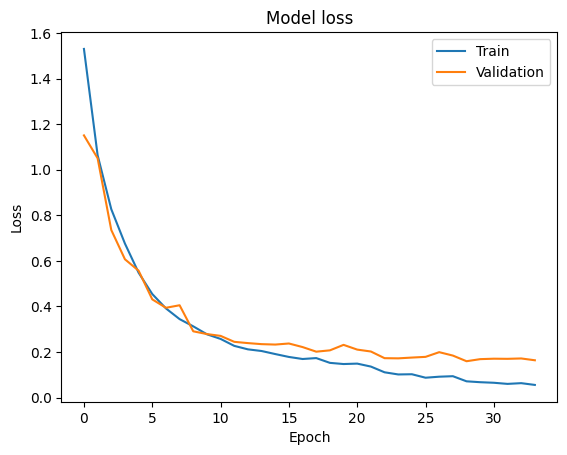

In [66]:
import matplotlib.pyplot as plt

# plot the train and validation losses 
plt.plot(losses)
plt.plot(val_losses)
 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

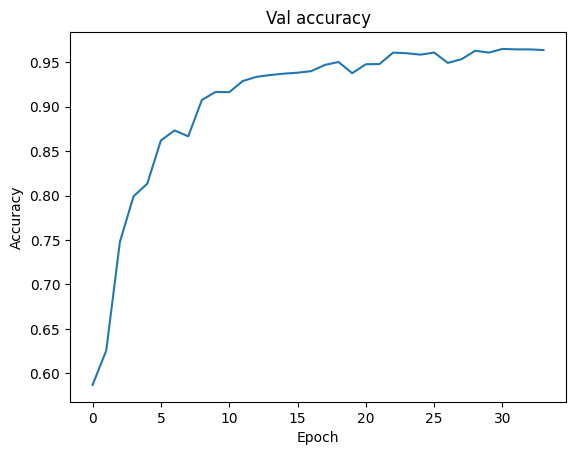

In [67]:
# plot the train and validation losses 
plt.plot(val_accs)

plt.title('Val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [68]:
# load the best model
best_model = CNN()
best_model.load_state_dict(torch.load('best-model.pt'))
best_model = best_model.to(device)

### Evaluate the model on test set

In [191]:
# define the test function 
def test(model, device, test_loader):
    model.eval()
    correct = 0
    test_loss = 0
    time = []
    with torch.no_grad():
        # iterate over test data
        for input, target in test_loader:
            input, target = input.to(device), target.to(device)

            # compute the time for the forward pass
            start_event = torch.cuda.Event(enable_timing=True)
            end_event = torch.cuda.Event(enable_timing=True)
            start_event.record()
            output = model(input) 
            end_event.record()
            torch.cuda.synchronize()
            time.append(start_event.elapsed_time(end_event))

            # convert output probabilities to predicted class
            _, preds = torch.max(output, dim=1)
          
            correct += (preds == target).sum().item()
    
    acc = correct / len(test_loader.dataset)
    samples_per_msec = len(test_loader.dataset) / np.sum(time)

    return acc, samples_per_msec


# find test accuracy and print it
test_acc, samples_per_msec = test(best_model, device, test_dataloader)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.922


#### Estimate the speed of inference for a model

In [192]:
# evaluate speed of a model in samples per second
print(f'Number of samples per millisecond: {int(samples_per_msec)}')

Number of samples per millisecond: 65


#### Visualize the results

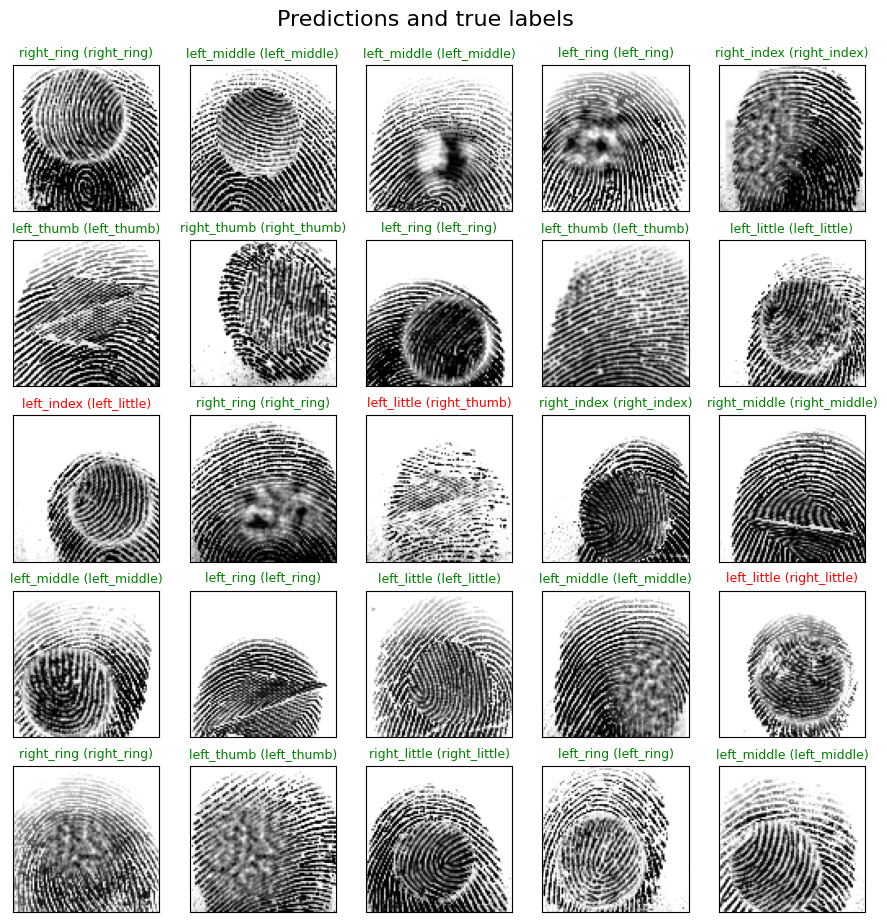

In [146]:
# get one batch of test images
images, labels = next(iter(test_dataloader))

# get sample outputs
output = model(images.to(device))
_, preds = torch.max(output, dim=1)

images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(11, 11))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title('{} ({})'.format(
        str(label_titles[preds[i]]), str(label_titles[labels[i]])),
        color=('g' if preds[i]==labels[i] else 'r'),
        fontsize=9)
    

plt.suptitle('Predictions and true labels', 
             fontsize=16, y=0.93)
plt.show()

### Questions
1. What preprocessing techniques did you use? Why?
    - For the preprocessing of the images, I applied the following transformations:
        *  Firstly, I observed that the images had different sizes. To fix this, I resized them to the smallest size among original images (103×96). Then, I detected some strange gray borders on the left and black borders on the right side of the images. To remove these borders, I cropped the images. After performing these steps the size of images was defined as 90x90.
        *  The original images were already in grayscale format. Therefore, there was no need to perform any grayscale conversion during the preprocessing stage.
        *  Finally, I converted the images into tensors and normalized them to help the model perform better.
2. What data augmentation techniques did you use?
    - I applied a rotation of the image within the range of -5 to 5 degrees, which randomly applies to images with a probability of 0.6. (I tried various values of probabilities in `RandomApply`, however, with the probability equal to 0.6 the model provided the best performance)
3. Describe the fine-tuning process and how you reached your final CNN model.
    - The process of fine-tuning a model involves several steps. First, determine the output layer dimensionality. It was set to match the number of label classes in the dataset, which is 10 for this task.
    - Then, the model architecture from the "Fingerprint Classification Using Deep Convolutional Neural Network" [paper](https://www.sciencepublishinggroup.com/journal/paperinfo?journalid=239&doi=10.11648/j.jeee.20210905.11) was used as a starting point.
    - Once the model architecture from the paper is used as the starting point, various modifications are tried, such as trying the different numbers of layers, adding padding to convolutional layers if needed, and adding new Dropout layer to reduce overfitting and Batch Normalization layers to speed up convergence.
4. What techniques did you use to improve model’s performance other than data augmentation
    - In addition to using data augmentation, I applied several other techniques to improve my model's performance. One of them is Early Stopping, which helps to prevent overfitting by stopping the training process when the validation loss no longer improves after some patience (5 epochs). 
    - I also used a LR scheduling - ReduceLROnPlateau, which reduces the learning rate by 0.7 when the validation loss doesn't improve for more than 3 epochs. 
    - Additionally, I added new layers to the model architecture, specifically Dropout and BatchNorm, which can improve the model's generalization and reduce overfitting.

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

#### Dataset loading

In [193]:
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('loan_data.csv')
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

### Preprocessing

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [195]:
# check whether the dataset have missing values
print(f'Number of missing values: {data.isna().sum().sum()}')

Number of missing values: 0


#### Categorical Encoding



In [196]:
from sklearn.preprocessing import OneHotEncoder


# encode categorical feature with one-hot-encoder
def encoding(df, feat_name, encoder):
    new_cols = pd.DataFrame(encoder.fit_transform(df[feat_name]), 
                    columns=encoder.get_feature_names_out(feat_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(feat_name, axis=1, inplace=True)
    return new_df


# define one-hot-encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# encode 'purpose' column in both training and test data
data_enc = encoding(data, ['purpose'], encoder)
data_enc.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                  0.0                         1.0   
1        0               0                  1.0                         0.0   
2        0               0                  0.0                         1.0   
3        0               0                  0.0                         1.0   
4        0               0                  1.0                         0.0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                  0.0                       0.0                     0.0   
1                  0.0                       0.0                     0.0   
2                  0.0                       0.0                     0.0   
3                  0.0                       0.0                     0.0   
4                  0.0                       0.0                     0.0   

   purpose_small_business  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [197]:
# select features from the dataset
X = data_enc.drop(['credit.policy'], axis=1)

# сreate the target 
y = data_enc['credit.policy']

In [198]:
# check the class balance
y.value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

As can be seen, we are dealing with an imbalanced dataset.

### Splitting the data

In [199]:
from sklearn.model_selection import train_test_split

# split the data into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  
                                                    stratify=y)

### Decision tree

In [200]:
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score


# calculate and print metrics
def print_metrics(true, pred):
    print(f'Recall: {recall_score(true, pred):.5f}')
    print(f'Precision: {precision_score(true, pred):.5f}')
    print(f'F1: {f1_score(true, pred):.5f}')
    print(f'Balanced accuracy: {balanced_accuracy_score(true, pred):.5f}')

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# create the model with no fine-tuning 
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# evaluate the initial model performance
print_metrics(y_test, y_pred)

Recall: 0.99416
Precision: 0.99159
F1: 0.99288
Balanced accuracy: 0.97970


In [202]:
# evaluate the initial model performance using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       374
           1       0.99      0.99      0.99      1542

    accuracy                           0.99      1916
   macro avg       0.98      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



#### Tuning the Decision tree

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# tune the decision tree applying grid search
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None] + list(range(1, 20)),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 6), 
              'max_features': [None, 'sqrt', 'log2']
              }

search = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=parameters, 
                      scoring=['f1', 'recall', 'precision'], refit='f1', 
                      cv=8, n_jobs=-1)

search.fit(X_train, y_train)

print('Best parameters (CV score=%0.3f):' % 
      search.best_score_, search.best_params_)

Best parameters (CV score=0.995): {'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [205]:
# print the best model
print(search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=3)


In [206]:
# define the best model
best_dtree = search.best_estimator_

best_dtree.fit(X_train, y_train)
y_pred_dt = best_dtree.predict(X_test)

# evaluate the model performance
print_metrics(y_test, y_pred_dt)

Recall: 0.99481
Precision: 0.99546
F1: 0.99513
Balanced accuracy: 0.98805


In [207]:
# evaluate the model performance using classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       374
           1       1.00      0.99      1.00      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



#### Visualize the Decision Tree

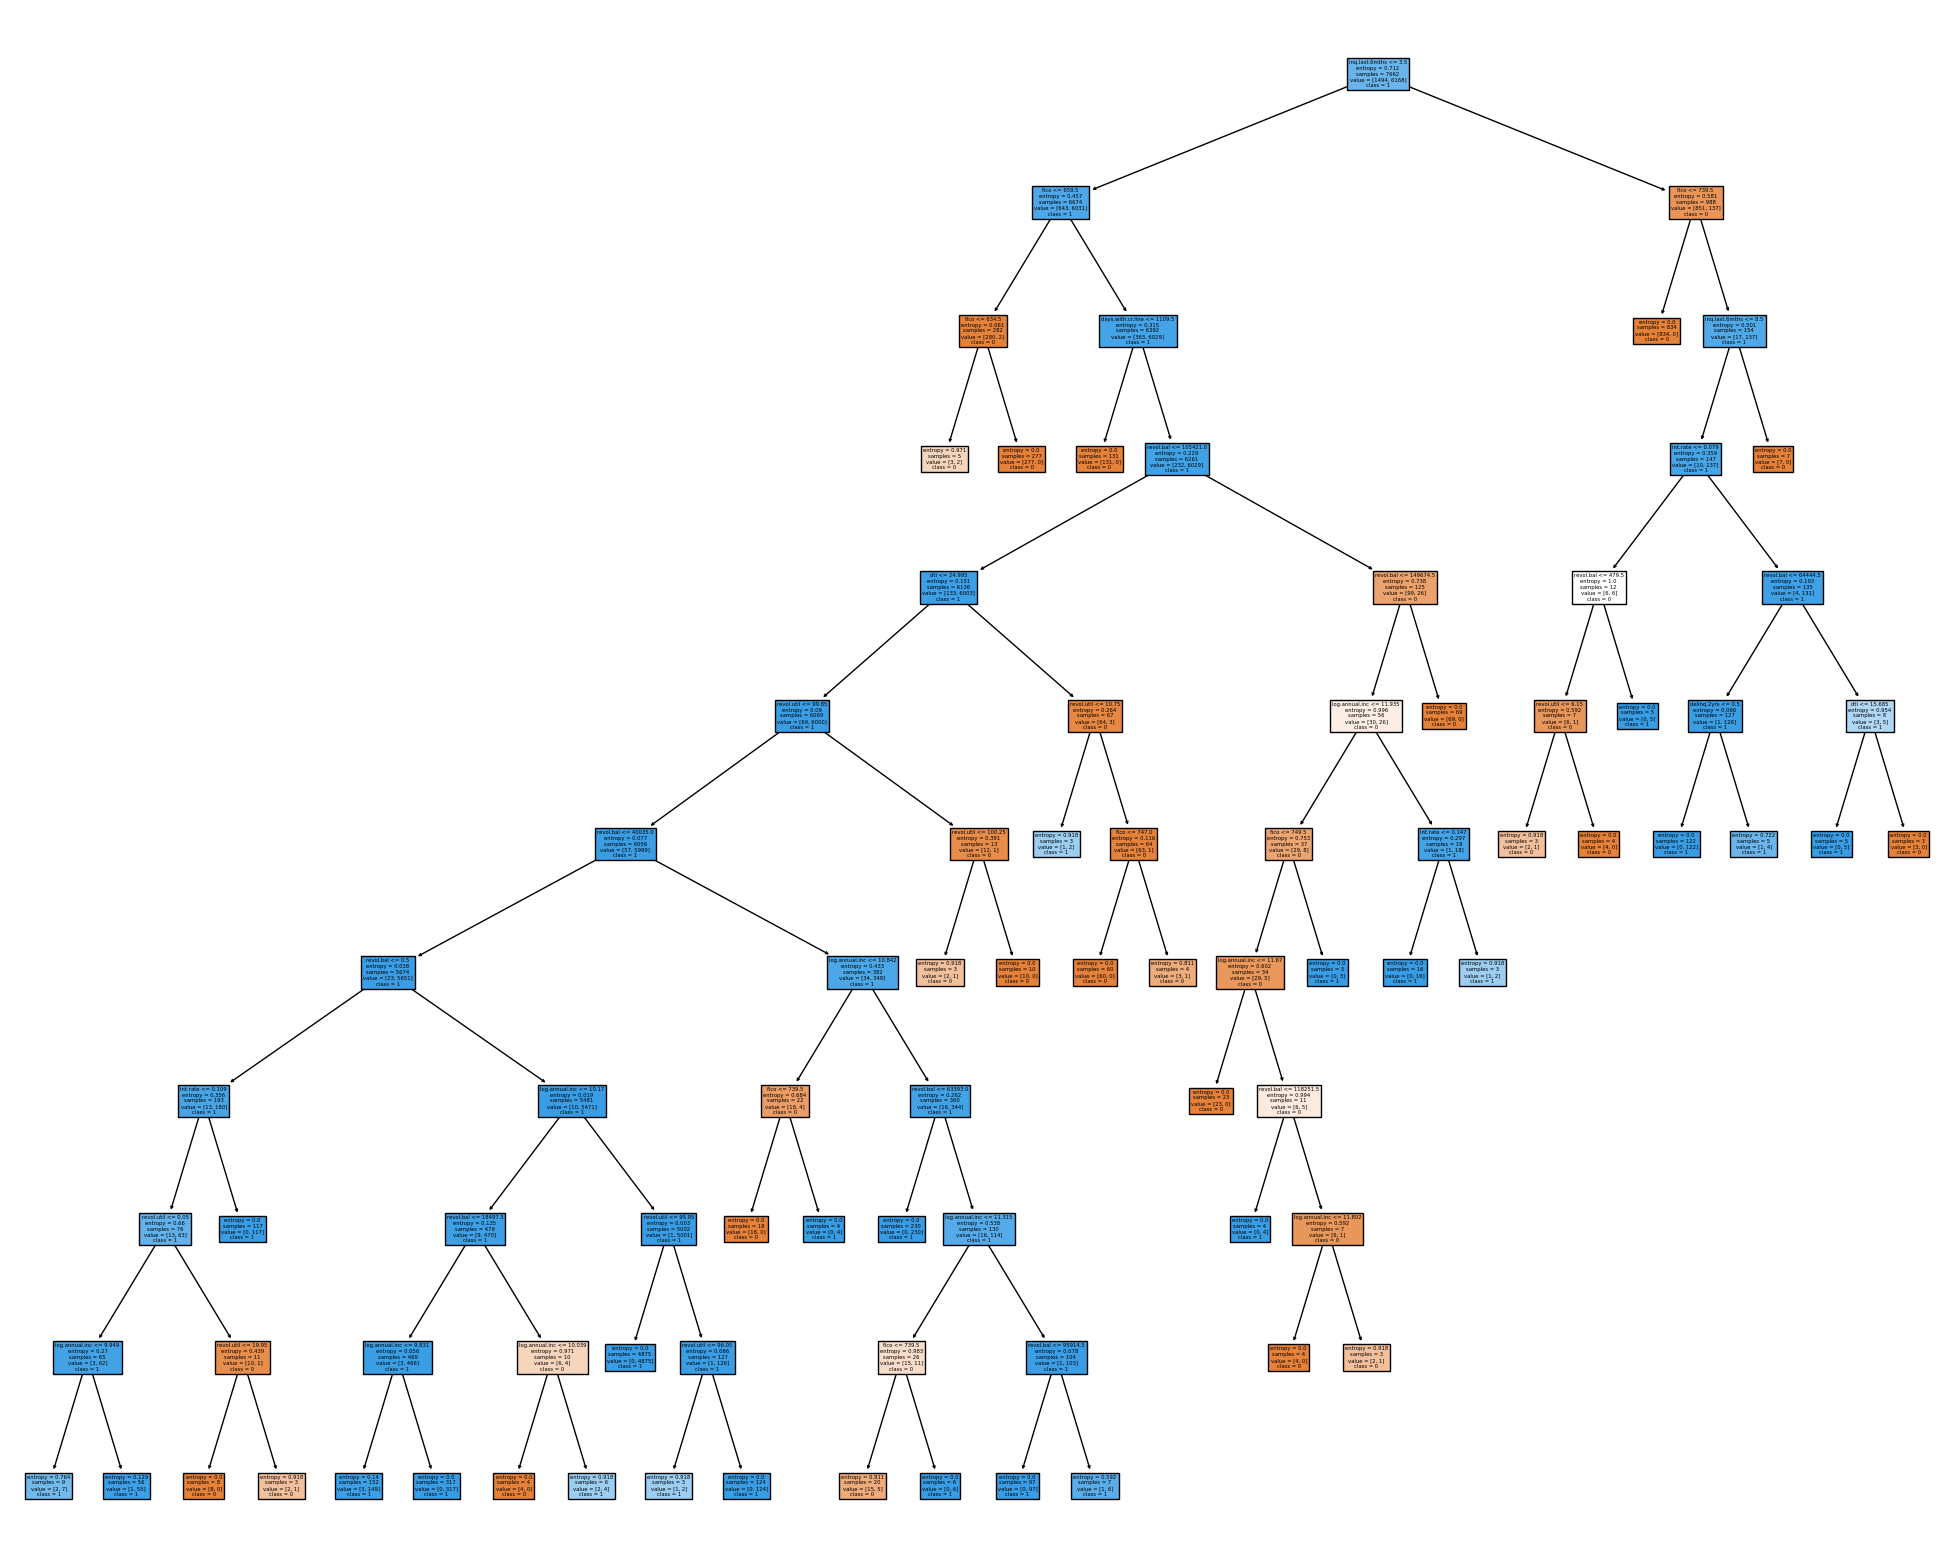

In [208]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the decision tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(best_dtree, feature_names=X_train.columns, 
              class_names=['0', '1'], filled=True)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create the model with no fine-tuning 
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# evaluate the performance
print_metrics(y_test, y_pred)

Recall: 0.99676
Precision: 0.99034
F1: 0.99354
Balanced accuracy: 0.97833


In [ ]:
# evaluate the initial model performance using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       374
           1       0.99      1.00      0.99      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



#### Tuning the Random Forest

In [ ]:
# tune the random forest applying grid search
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [25, 50, 75, 100, 150, 200],
              'max_depth': [None] + list(np.arange(1, 20, 2)),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 6), 
              'max_features': [None, 'sqrt', 'log2']
              }

search = GridSearchCV(estimator=RandomForestClassifier(), 
                      param_grid=parameters, 
                      scoring=['f1', 'recall', 'precision'], refit='f1', 
                      cv=5, n_jobs=-1)

search.fit(X_train, y_train)

print('Best parameters (CV score=%0.3f):' % 
      search.best_score_, search.best_params_)

Best parameters (CV score=0.995): {'criterion': 'entropy', 'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# print the best model
print(search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features=None,
                       n_estimators=50)


In [ ]:
# define the best model
best_forest = search.best_estimator_

best_forest.fit(X_train, y_train)
y_pred_rf = best_forest.predict(X_test)

# evaluate the model performance
print_metrics(y_test, y_pred_rf)

Recall: 0.99611
Precision: 0.99676
F1: 0.99643
Balanced accuracy: 0.99137


In [ ]:
# evaluate the model performance using classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       374
           1       1.00      1.00      1.00      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



#### Visualize the Random Forest

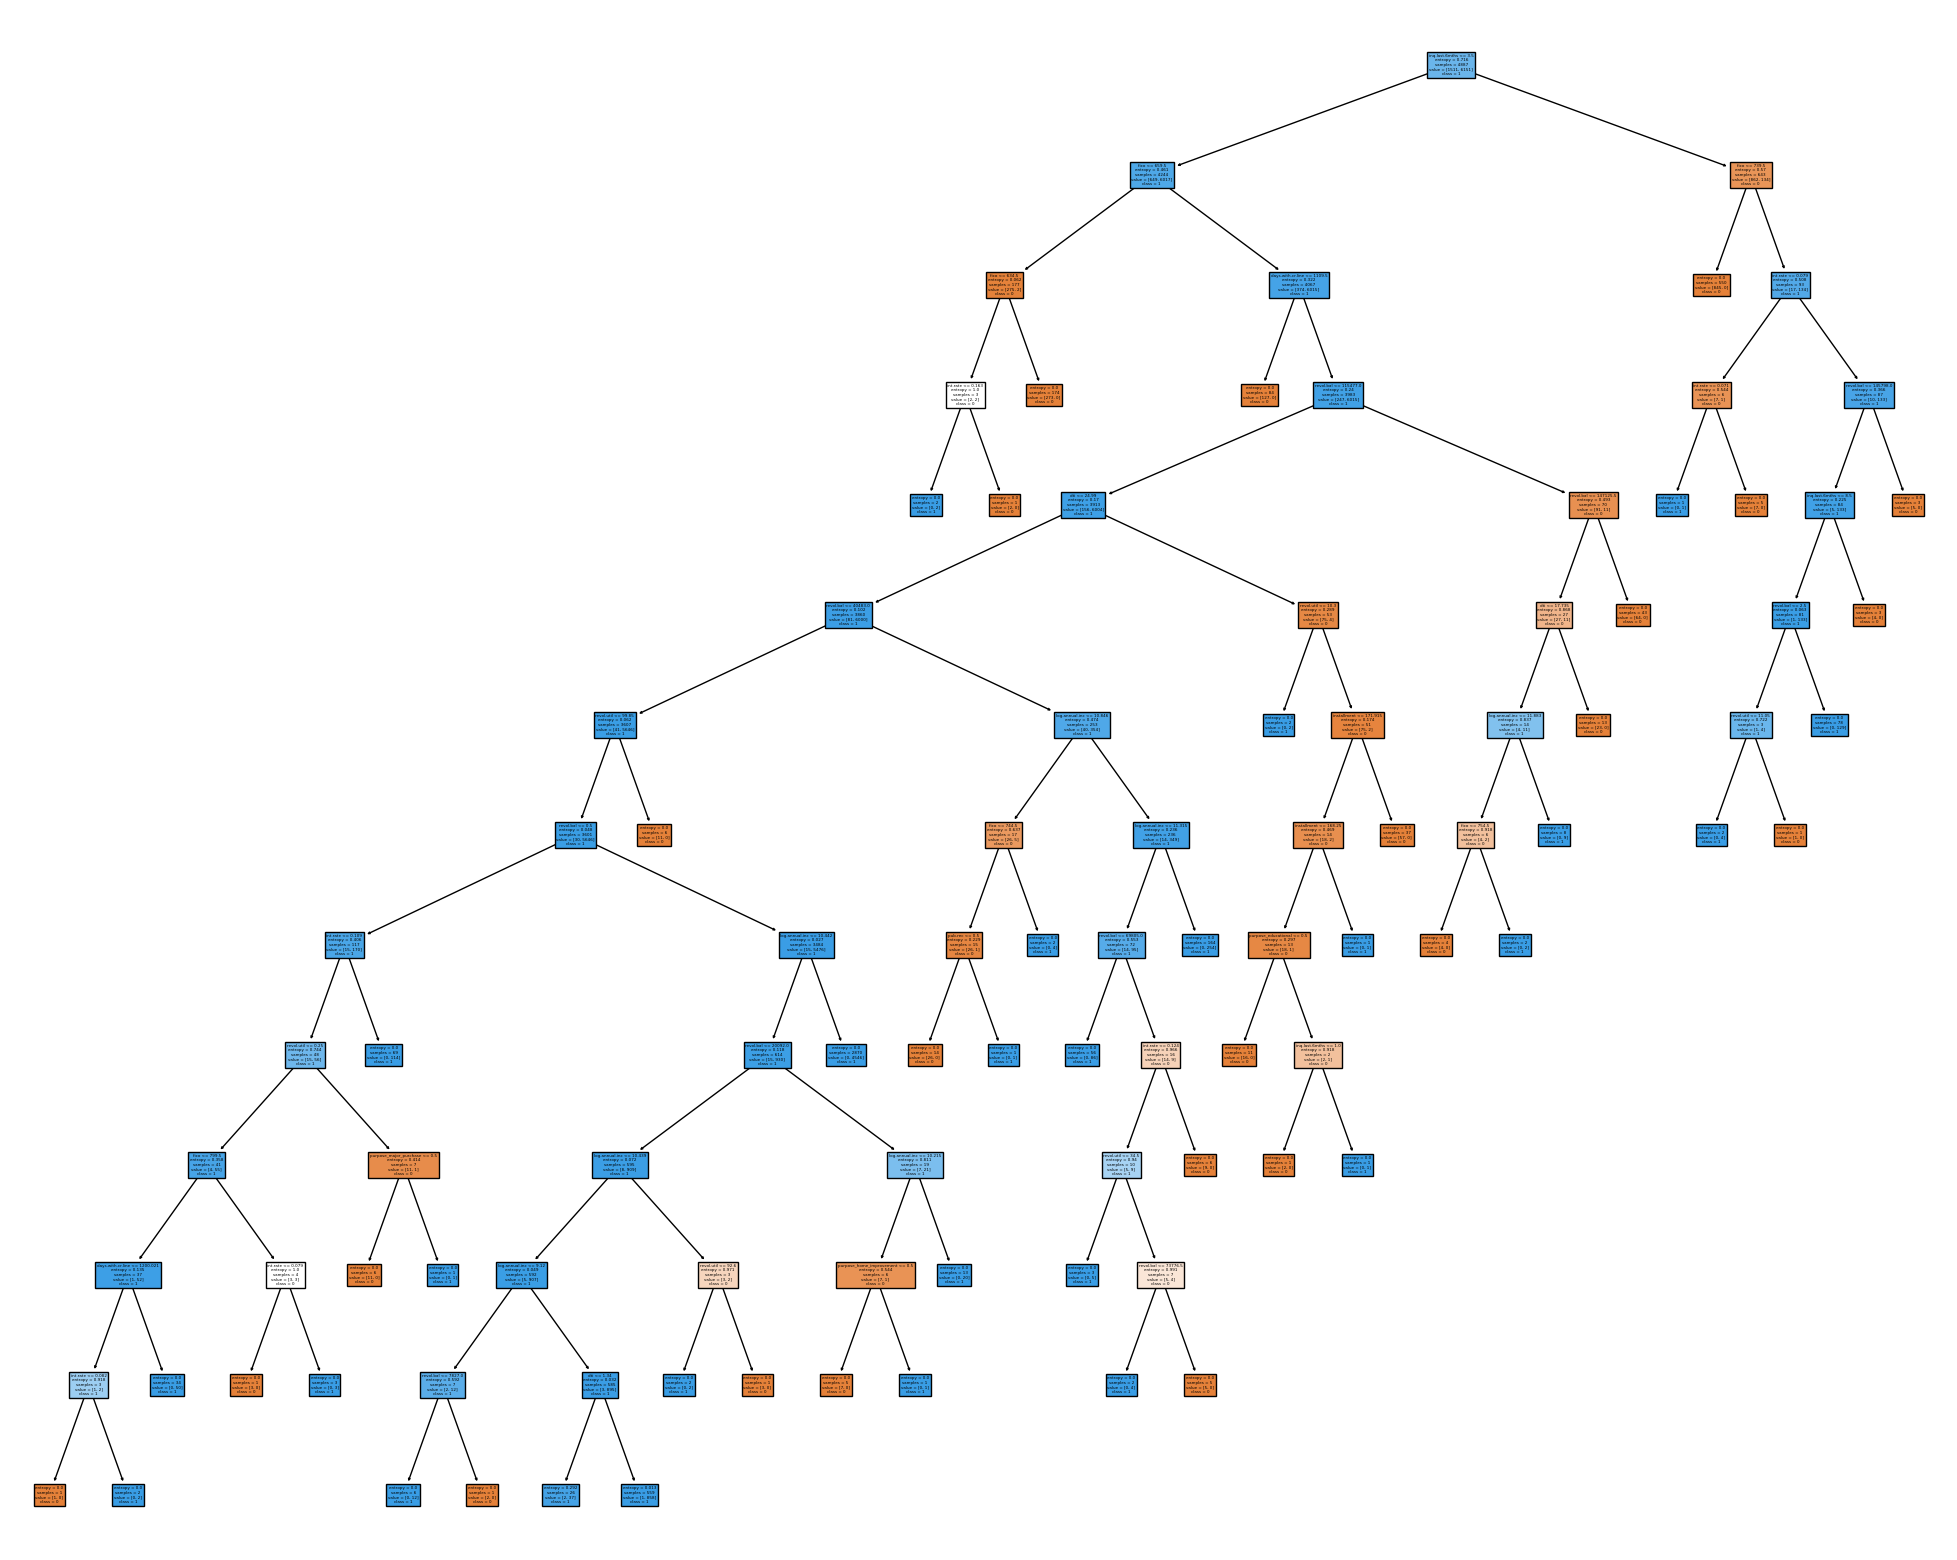

In [ ]:
# visualize one tree from the random forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(best_forest.estimators_[5], feature_names=X_train.columns, 
              class_names=['0', '1'], filled=True)

### Questions
1. How did the DT compare to the RF in performance? Why?
    - According to the obtained results after tuning the models, both decision tree and random forest perform well for the given task. However, RF is more efficient in terms of metrics such as balanced accuracy score, precision and f1 score compared to DT. Specifically, balanced accuracy score for DT is `0.98805`, while for RF is `0.99137`. It can be concluded that RF performs slightly better than DT, as RF provides more accurate predictions by combining the multiple trees (50 in this case) together.
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - After fine-tuning, I observed the decision tree's max_depth is equal to 11, while the random forest's max_depth is equal to 13. DT has smaller depth than RF, that can happen as the decision tree is a single tree-based model, while the random forest is an ensemble of decision trees and the depth of each tree can vary. Therefore, trees in random forests may be deeper than in decision trees before overfitting is because of the ensemble learning technique used in random forests. By combining the predictions of multiple decision trees, random forests allow to reduce the variance and increase the predictive accuracy of the model.
    

3. What is ensemble learning? What are its pros and cons?
    - Ensemble learning is a technique that allows the combination of multiple models to form a single, more accurate model.
    - Advantages: 
        1. Ensemble learning provides a higher predictive accuracy compared to a single model. 
        2. Ensemble learning can reduce the variance or bias due to the combination of multiple models. 
        3. It can help prevent overfitting by combining multiple models trained on different subsets of data.
    - Disdvantages:
        1. Low interpretability of the resulting model. For example, when dealing with a single decision tree, it is possible to visualize and interpret it, but in ensemble learning, this becomes a challenging task, since predictions are made based on the combined output of several models.
        2. Ensemble learning can increase the complexity of the model and make it harder to interpret and explain.
        3. Ensemble learning can be computationally expensive, particularly if a large number of models are combined together.


4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - Boosting methods (help to reduce the bias) are the following:
        1. Adaptive Boosting:  a technique that identifies misclassified samples and adjusts their weights during each iteration in order to minimize the training error.
        2. Gradient Boosting: sequentially adds the predictors, and each one corrects the errors of the previous predictor by learning from the residual errors of the previous model.
    - Bagging methods (help to reduce the variance):
        1. Bootstrapping: a technique that uses sampling with replacement, where samples are derived from the entire dataset.
        2. Aggregation: a technique that uses incorporating outcomes, outcomes of all models are considered and major voting applied to determine the final prediction.
    - Random Forest falls under bagging methods as it uses bootstrapping to create multiple samples from the dataset and randomly select a subset of features at each node in the tree, as well as uses aggregation to make the final prediction.